<a href="https://colab.research.google.com/github/karishmasd/ML/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The code implements a simple linear regression model using gradient descent to predict profits based on population size. It involves loading data, defining a cost function to measure prediction errors, iteratively adjusting model parameters using gradient descent to minimize the cost, and visualizing the results with a regression line plotted against the training data. Finally, it uses the trained model to predict profits for specific population**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
%matplotlib inline


# **Data**

In [ ]:
def load_data():
    data = np.loadtxt("/content/drive/MyDrive/Data/ex1data1.txt", delimiter=',')
    X = data[:,0]
    y = data[:,1]
    return X, y


In [ ]:
x_train,y_train=load_data()
x_train.shape,y_train.shape

((97,), (97,))

In [ ]:
x_train[:5]

array([6.1101, 5.5277, 8.5186, 7.0032, 5.8598])

In [ ]:
y_train[:5]

array([17.592 ,  9.1302, 13.662 , 11.854 ,  6.8233])

Text(0.5, 0, 'Population of City in 10,000s')

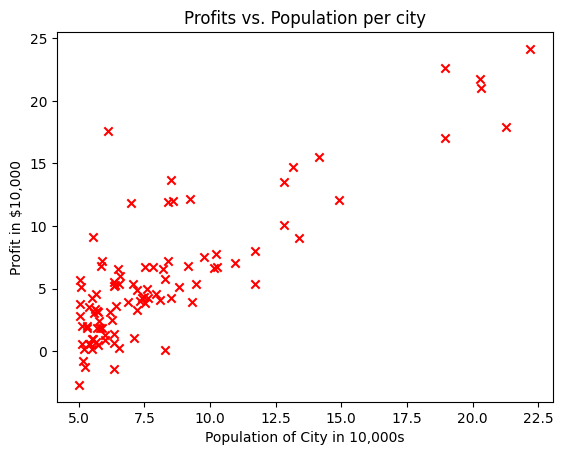

In [ ]:
plt.scatter(x_train,y_train,marker='x',c='r')
plt.title("Profits vs. Population per city")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')

#**Compute Cost**

In [ ]:
 def compute_cost(x, y, w, b):
    m = x.shape[0]
    total_cost = 0

    for i in range(m):
        y_hat = w * x[i] + b
        cost = (y_hat - y[i]) ** 2
        total_cost += cost

    total_cost = total_cost / (2 * m)

    return total_cost

#**Gradient Descent**

In [ ]:
def compute_gradient(x,y,w,b):
  m=x.shape[0]
  dj_dw = 0
  dj_db = 0
  for i in range (m ):
    y_hat=w*x[i]+b
    dj_dw_i=(y_hat-y[i])*x[i]
    dj_db_i=(y_hat-y[i])
    dj_dw+=dj_dw_i
    dj_db+=dj_db_i
  dj_dw=dj_dw/m
  dj_db=dj_db/m
  return dj_dw,dj_db

In [ ]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
  m=x.shape[0]
  J_history = []
  w_history = []
  w = copy.deepcopy(w_in)
  b = b_in
  for i in range(num_iters):
    dj_dw,dj_db=compute_gradient(x,y,w,b)
    w=w-alpha*dj_dw
    b=b-alpha*dj_db
    if i<100000:
      J_history.append( compute_cost(x, y, w , b))
    if i% math.ceil(num_iters/10) == 0:
      w_history.append(w)
      print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

  return w, b, J_history, w_history


In [ ]:
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 2000
alpha = 0.009

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b,compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     7.68   
Iteration  200: Cost     5.23   
Iteration  400: Cost     4.87   
Iteration  600: Cost     4.68   
Iteration  800: Cost     4.58   
Iteration 1000: Cost     4.53   
Iteration 1200: Cost     4.51   
Iteration 1400: Cost     4.49   
Iteration 1600: Cost     4.48   
Iteration 1800: Cost     4.48   
w,b found by gradient descent: 1.1775061196556194 -3.7412179313955325


#**Regression line**

In [ ]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

Text(0.5, 0, 'Population of City in 10,000s')

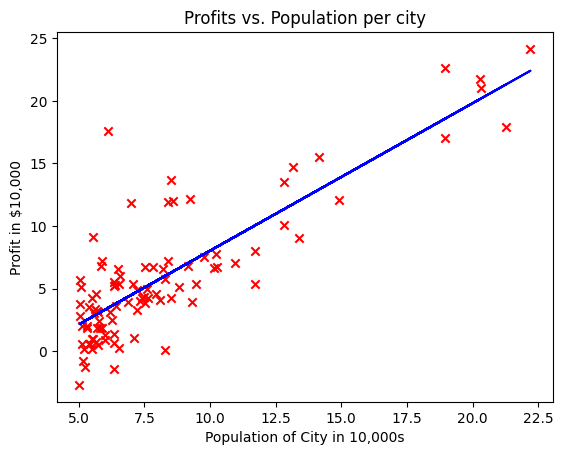

In [ ]:

plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data.
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title("Profits vs. Population per city")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')

#**Predictions**

In [ ]:
predict1 = 7.9* w + b
print('For population = 79,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 9* w + b
print('For population = 90,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 79,000, we predict a profit of $55610.80
For population = 90,000, we predict a profit of $68563.37
